In [4]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot  as plt 
import seaborn as sns 



In [5]:
df = pd.read_csv('../data/train (1).csv')

In [29]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [30]:
df.columns

Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'],
      dtype='object')

In [31]:
df.shape


(517754, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [33]:
df.describe(include='all')

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
count,517754.000000,517754,517754.000000,517754.000000,517754.000000,517754,517754,517754,517754,517754,517754,517754,517754.000000,517754.000000
unique,NaN,3,NaN,NaN,NaN,3,3,2,2,3,2,2,NaN,NaN
top,NaN,highway,NaN,NaN,NaN,dim,foggy,False,True,morning,True,False,NaN,NaN
freq,NaN,173672,NaN,NaN,NaN,183826,181463,259289,260045,173410,260688,260164,NaN,NaN
mean,258876.500000,NaN,2.491511,0.488719,46.112575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.187970,0.352377
std,149462.849975,NaN,1.120434,0.272563,15.788521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.895961,0.166417
min,0.000000,NaN,1.000000,0.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,129438.250000,NaN,1.000000,0.260000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.230000
50%,258876.500000,NaN,2.000000,0.510000,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.340000
75%,388314.750000,NaN,3.000000,0.710000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.460000


In [34]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop('id',axis=1,inplace=True)

EDA


In [7]:
cols= df.columns.tolist()

In [37]:
cols


['road_type',
 'num_lanes',
 'curvature',
 'speed_limit',
 'lighting',
 'weather',
 'road_signs_present',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season',
 'num_reported_accidents',
 'accident_risk']

In [8]:
cat_cols = df.select_dtypes(include=["object","bool"]).columns.to_list()

In [39]:
cat_cols

['road_type',
 'lighting',
 'weather',
 'road_signs_present',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season']

In [9]:
num_cols= list(set(cols)-set(cat_cols))

In [10]:
num_cols

['accident_risk',
 'num_lanes',
 'speed_limit',
 'curvature',
 'num_reported_accidents']

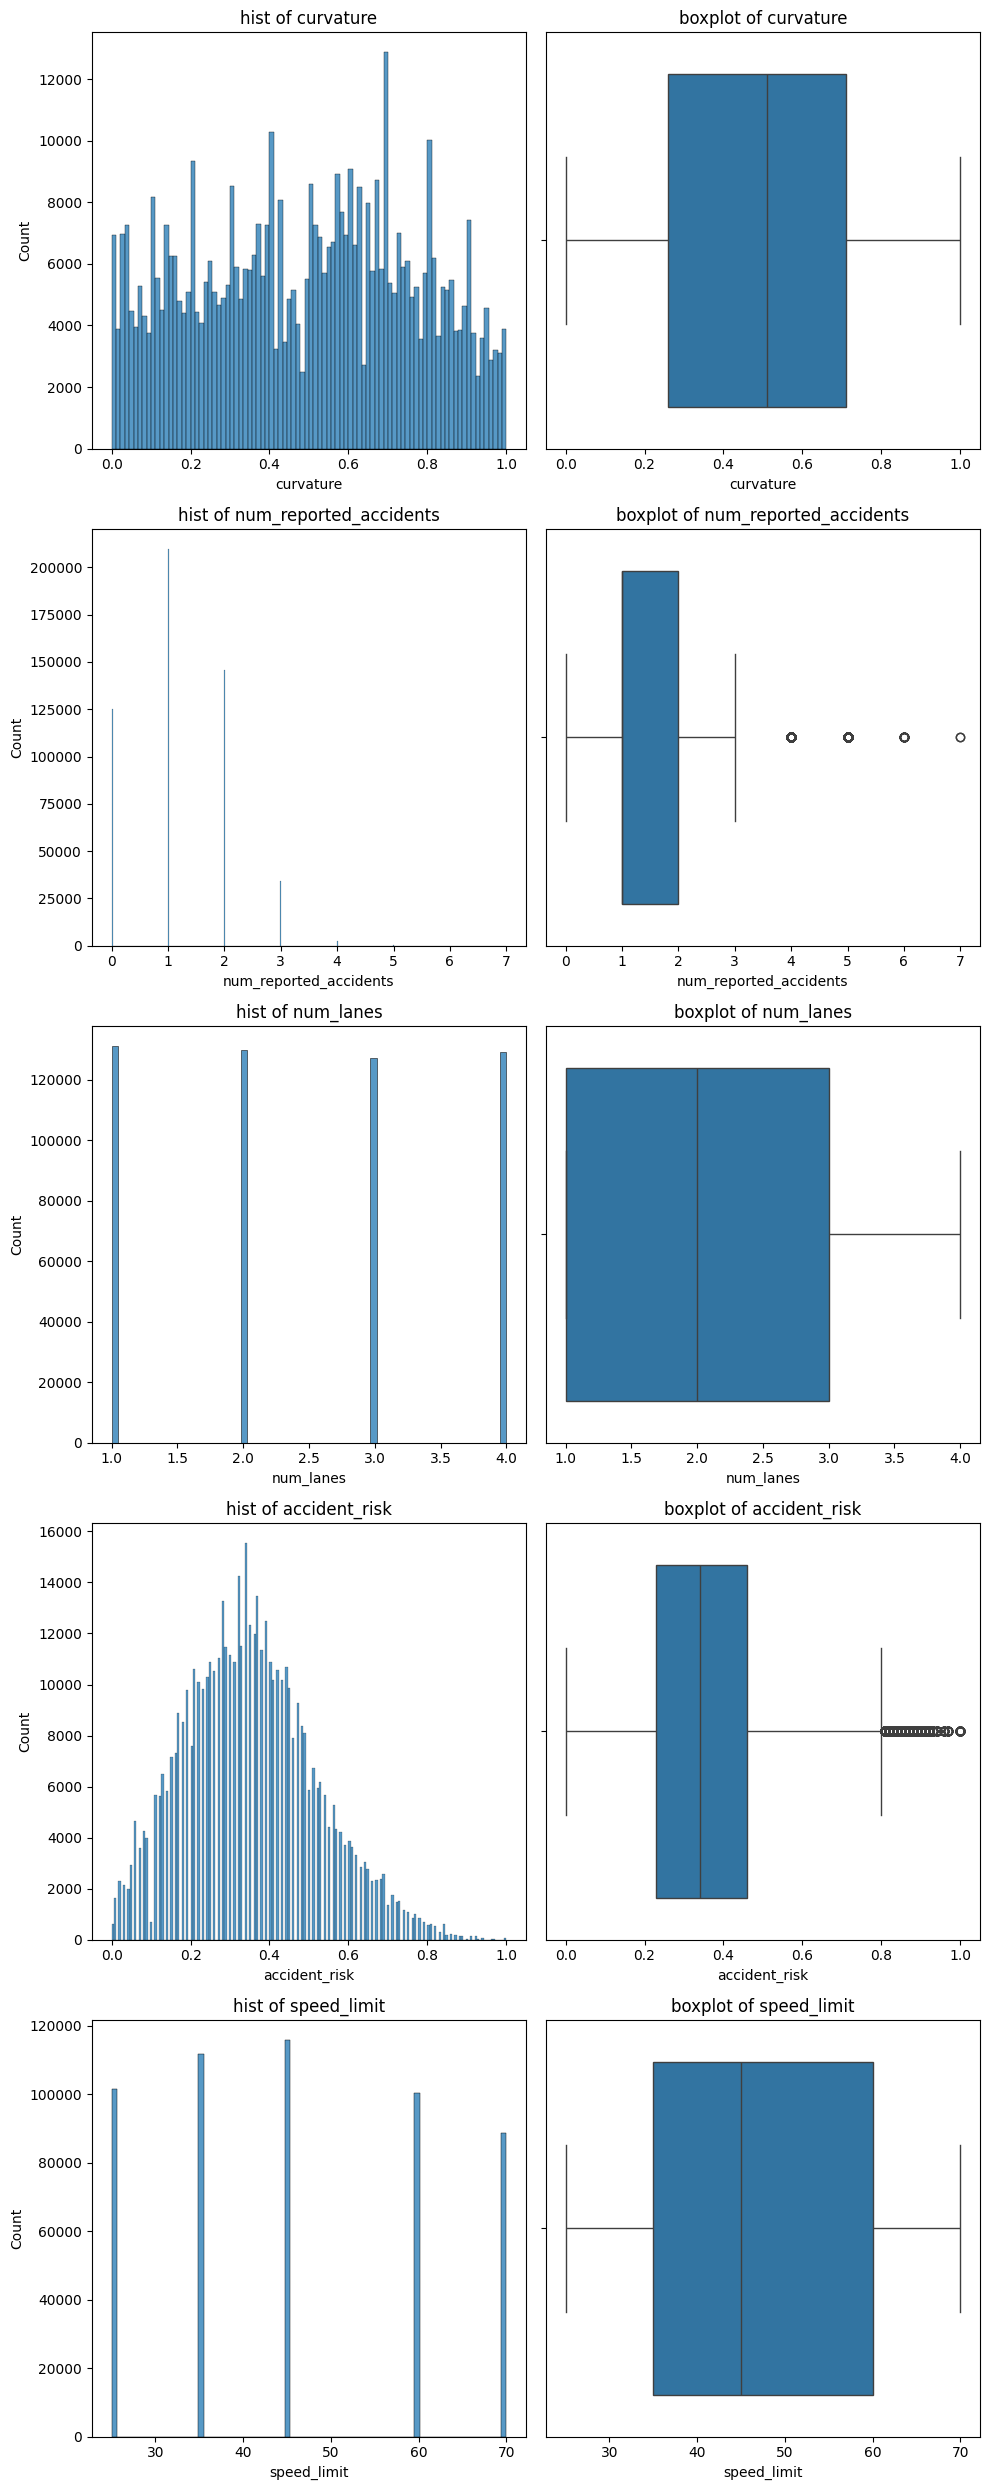

In [42]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(10, 5*len(num_cols)))
for i,col in enumerate(num_cols):
    sns.histplot(df,x=col,ax=axes[i,0])
    axes[i,0].set_title(f'hist of {col}')
    
    sns.boxplot(df,x=col,ax=axes[i,1])
    axes[i,1].set_title(f'boxplot of {col}')
plt.tight_layout()


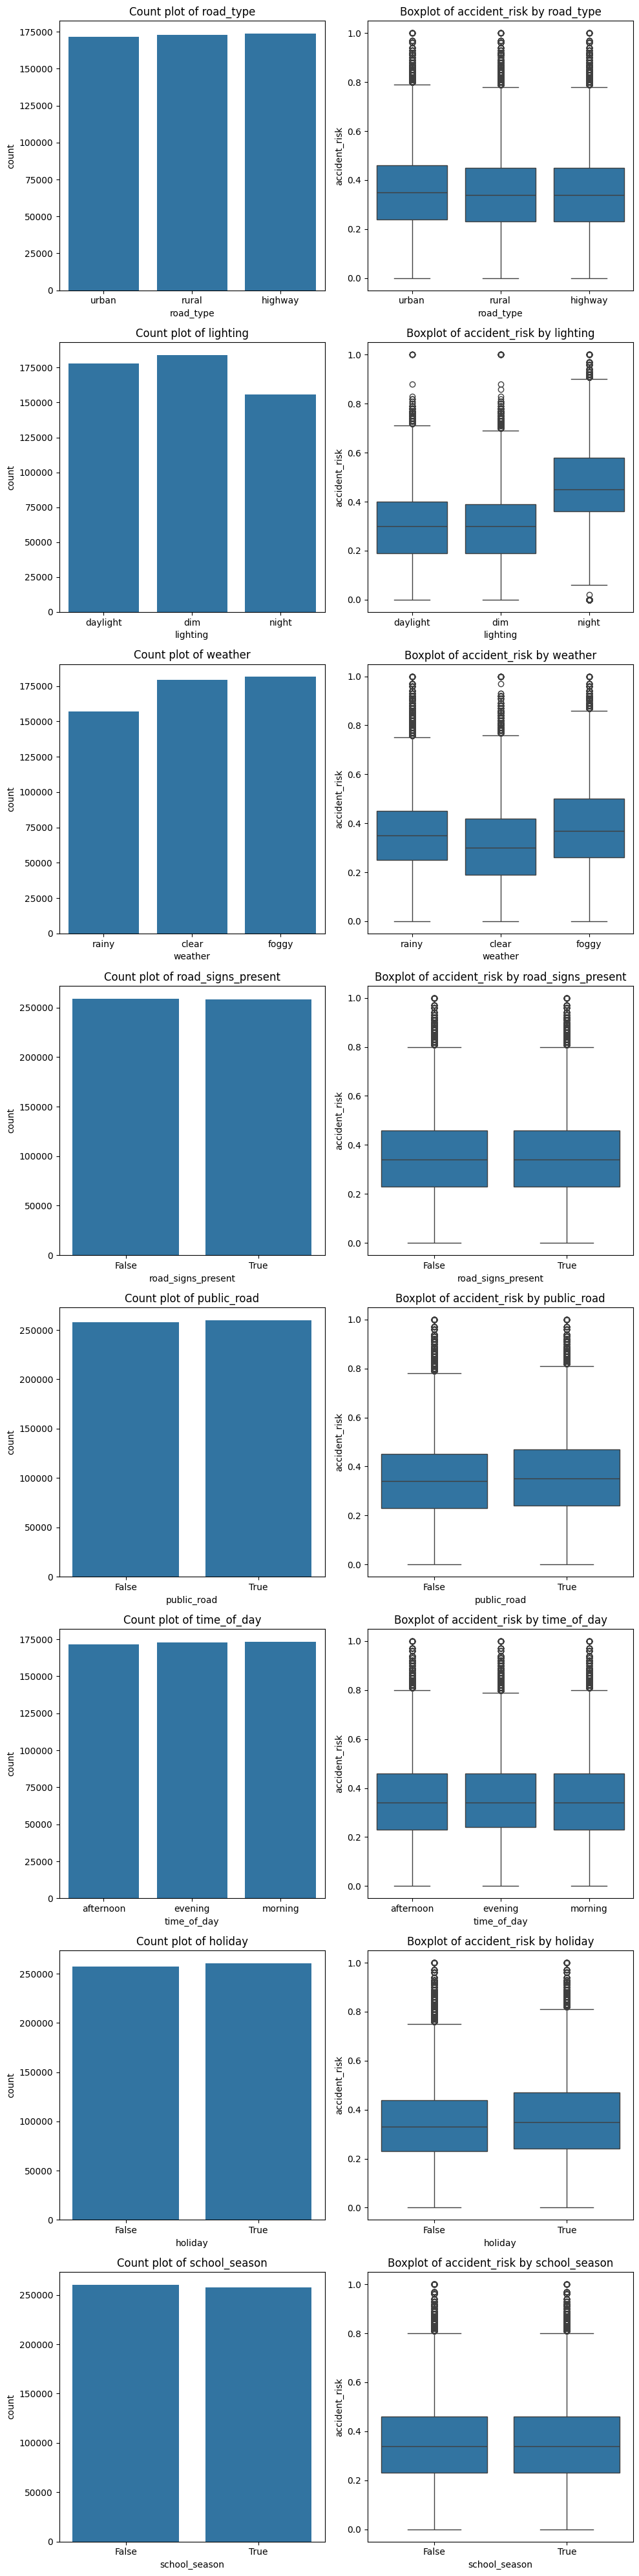

In [43]:
fig, axes = plt.subplots(len(cat_cols), 2, figsize=(10, 5*len(cat_cols)))
for i,col in enumerate(cat_cols):
    sns.countplot(df,x=col,ax=axes[i,0])
    axes[i,0].set_title(f'Count plot of {col}')
    
    sns.boxplot(data=df, x=col, y='accident_risk', ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of accident_risk by {col}')
plt.tight_layout()


In [44]:
corr= df[num_cols].corr()

<Axes: >

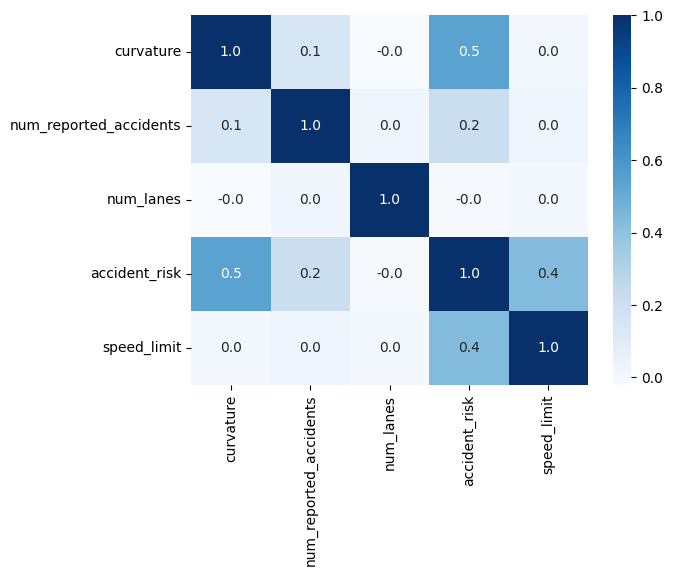

In [45]:
sns.heatmap(corr,annot=True,fmt='.1f',cmap='Blues')

In [46]:
df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [11]:
X,y=df[cols[:-1]].copy(deep=True),df[cols[-1]].copy(deep=True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [13]:
encoder =OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')
encoder.fit(X[cat_cols])
encoder.get_feature_names_out()

array(['road_type_rural', 'road_type_urban', 'lighting_dim',
       'lighting_night', 'weather_foggy', 'weather_rainy',
       'road_signs_present_True', 'public_road_True',
       'time_of_day_evening', 'time_of_day_morning', 'holiday_True',
       'school_season_True'], dtype=object)

In [14]:
X_encoded = encoder.transform(X[cat_cols])
X_encoded

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 1., 1.]], shape=(517754, 12))

In [15]:
X_encoded= pd.DataFrame(X_encoded,columns=encoder.get_feature_names_out())


In [52]:
X_encoded

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,road_signs_present_True,public_road_True,time_of_day_evening,time_of_day_morning,holiday_True,school_season_True
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
517750,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
517752,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [16]:
num_cols.remove('accident_risk')


In [17]:
num_cols


['num_lanes', 'speed_limit', 'curvature', 'num_reported_accidents']

In [18]:
X_encoded[num_cols]=X[num_cols]

In [19]:
X_encoded.shape

(517754, 16)

In [20]:
X_train ,X_val,y_train ,y_val=train_test_split(X_encoded,y,test_size=0.2,random_state=0)

In [2]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [3]:
rfr = RandomForestRegressor(
    n_jobs=2
)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_val)
root_mean_squared_error(y_val,pred)



NameError: name 'X_train' is not defined

In [ ]:
import joblib
joblib.